# MOwNiT
## Laboratorium 2
### Analiza danych - DataFrames

- Zaawansowany pakiet do działania na tabelkach nxm danych 
- Podobne do pandas DataFrames w Pythonie albo data.frame w R
- Specjalistyczne funkcje do statystyki
- W przypadku włąsnej instalacji należy zaistalować pakiet:

```julia
Pkg.add("DataFrames")
```

- DataFrame to rodzaj bazy danych in-memory
- Składa się z kolumn, do których odwołujemy się używając symboli
- Każda z kolumn może przechowywać inny typ (inaczej niż w dwuwymiarowych tablicach )
- od wersji 0.11 każda z kolumn jest typu Array{T,1} gdzie T jest okreslonym typem danych (np. Float64)
- strona pakietu: https://github.com/JuliaStats/DataFrames.jl
- dokumentacja najnowszej wersji: https://juliadata.github.io/DataFrames.jl/stable/index.html





In [2]:
# za pierwszym razem instalujemy
# using Pkg
# Pkg.add("DataFrames")

In [3]:
# Tworzenie DataFrame
using DataFrames
df1=DataFrame()
df1.MojaKolumna= 1:4
df1.x2= [4,pi,sqrt(2), 42]
df1.Col3= [true,false, true, false]
show(df1)

4×3 DataFrame
 Row │ MojaKolumna  x2        Col3  
     │ Int64        Float64   Bool  
─────┼──────────────────────────────
   1 │           1   4.0       true
   2 │           2   3.14159  false
   3 │           3   1.41421   true
   4 │           4  42.0      false

In [4]:
# ! - nie tworzy kopii, : - tworzy kopię
typeof(df1[!,2])

Vector{Float64} (alias for Array{Float64, 1})

In [5]:
typeof(df1.Col3)

Vector{Bool} (alias for Array{Bool, 1})

In [6]:
# możemy też utworzyć DataFrame używając konstruktora
df2=DataFrame(MojaKolumna=1:10, 
    Col2=[2,pi, sqrt(2), 3, 4,2,pi, sqrt(2), 3, 4], 
    Col3=[true,true,false,true,false,true,true,false,true,false])

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,1
2,2,3.14159,1
3,3,1.41421,0
4,4,3.0,1
5,5,4.0,0
6,6,2.0,1
7,7,3.14159,1
8,8,1.41421,0
9,9,3.0,1


In [7]:
# ilosc wierszy
size(df2, 1) 

10

In [8]:
#ilosc kolumn
size(df2, 2) 

3

In [9]:
# można odwoływać się po indeksie
show(df2[:,2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [10]:
# albo po symbolu kolumny
show(df2[!,:Col2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [11]:
# wiersze lub podzbiory wierszy i kolumn uzyskujemy poprzez operator (:). Wynikiem jest nowy DataFrame
show(df2[3,:])

DataFrameRow
 Row │ MojaKolumna  Col2     Col3  
     │ Int64        Float64  Bool  
─────┼─────────────────────────────
   3 │           3  1.41421  false

In [12]:
# drugi i trzeci wiersz
df2[2:3, :]

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,2,3.14159,1
2,3,1.41421,0


In [13]:
# druga kolumna drugiego i trzeciego wiersza
df2[2:3, :Col2]

2-element Vector{Float64}:
 3.141592653589793
 1.4142135623730951

In [14]:
# druga i trzecia kolumna drugiego i trzeciego wiersza
df2[2:3,[:Col2, :Col3]]

,Col2,Col3
,Float64,Bool
1,3.14159,1
2,1.41421,0


In [15]:
# pierwsze sześć wierszy
DataFrames.first(df2,6)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,1
2,2,3.14159,1
3,3,1.41421,0
4,4,3.0,1
5,5,4.0,0
6,6,2.0,1


In [16]:
# ostatnie sześć wierszy
DataFrames.last(df2,6)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,5,4.0,0
2,6,2.0,1
3,7,3.14159,1
4,8,1.41421,0
5,9,3.0,1
6,10,4.0,0


In [17]:
# nazwy kolumn
names(df2)

3-element Vector{String}:
 "MojaKolumna"
 "Col2"
 "Col3"

In [18]:
# typy kolumn
eltype.(eachcol(df2))

3-element Vector{DataType}:
 Int64
 Float64
 Bool

In [19]:
# podstawowe dane statystyczne o wartościach w kolumnie
describe(df2)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,MojaKolumna,5.5,1,5.5,10,0,Int64
2,Col2,2.71116,1.41421,3.0,4.0,0,Float64
3,Col3,0.6,0,1.0,1,0,Bool


In [20]:
using Statistics
mean(df2.Col2)

2.711161243192578

In [21]:
var(df2.Col2)

0.9150284373648316

In [24]:
# Pkg.add("CSV")
using CSV
input="winequality.csv"
mydata=CSV.read(input, delim=";",DataFrame)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide
,Float64,Float64,Float64,Float64,Float64,Float64
1,7.4,0.7,0.0,1.9,0.076,11.0
2,7.8,0.88,0.0,2.6,0.098,25.0
3,7.8,0.76,0.04,2.3,0.092,15.0
4,11.2,0.28,0.56,1.9,0.075,17.0
5,7.4,0.7,0.0,1.9,0.076,11.0
6,7.4,0.66,0.0,1.8,0.075,13.0
7,7.9,0.6,0.06,1.6,0.069,15.0
8,7.3,0.65,0.0,1.2,0.065,15.0
9,7.8,0.58,0.02,2.0,0.073,9.0


In [25]:
describe(mydata)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,fixed acidity,8.31964,4.6,7.9,15.9,0,Float64
2,volatile acidity,0.527821,0.12,0.52,1.58,0,Float64
3,citric acid,0.270976,0.0,0.26,1.0,0,Float64
4,residual sugar,2.53881,0.9,2.2,15.5,0,Float64
5,chlorides,0.0874665,0.012,0.079,0.611,0,Float64
6,free sulfur dioxide,15.8749,1.0,14.0,72.0,0,Float64
7,total sulfur dioxide,46.4678,6.0,38.0,289.0,0,Float64
8,density,0.996747,0.99007,0.99675,1.00369,0,Float64
9,pH,3.31111,2.74,3.31,4.01,0,Float64


In [26]:
typeof(mydata)

DataFrame

In [27]:
size(mydata)

(1599, 12)

In [28]:
# Dzielenie DataFrame na podgrupy i działania na nich

# Split -Apply - Combine

#https://dataframes.juliadata.org/stable/man/split_apply_combine/

# rozdzielanie na podgrupy po jakości wina (quality)
# Split

wine_grouped=groupby(mydata, :quality)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide
,Float64,Float64,Float64,Float64,Float64,Float64
1,7.4,0.7,0.0,1.9,0.076,11.0
2,7.8,0.88,0.0,2.6,0.098,25.0
3,7.8,0.76,0.04,2.3,0.092,15.0
4,7.4,0.7,0.0,1.9,0.076,11.0
5,7.4,0.66,0.0,1.8,0.075,13.0
6,7.9,0.6,0.06,1.6,0.069,15.0
7,7.5,0.5,0.36,6.1,0.071,17.0
8,6.7,0.58,0.08,1.8,0.097,15.0
9,7.5,0.5,0.36,6.1,0.071,17.0


In [29]:

# podsumowanie ile jest win w każdej grupie 
combine(wine_grouped, nrow)

,quality,nrow
,Int64,Int64
1,5,681
2,6,638
3,7,199
4,4,53
5,8,18
6,3,10


In [30]:
combine(wine_grouped, "fixed acidity" => mean)

,quality,fixed acidity_mean
,Int64,Float64
1,5,8.16725
2,6,8.34718
3,7,8.87236
4,4,7.77925
5,8,8.56667
6,3,8.36


In [31]:
# zliczenie liczby win o danej jakości i zawartości alkoholu, posortowane
wine_grouped2=sort(combine(groupby(mydata, [:quality,:alcohol]),nrow=> :liczba), [:quality,:alcohol])

,quality,alcohol,liczba
,Int64,Float64,Int64
1,3,8.4,1
2,3,9.0,1
3,3,9.7,1
4,3,9.8,1
5,3,9.9,1
6,3,9.95,1
7,3,10.2,1
8,3,10.7,1
9,3,10.9,1


In [32]:
# zapis do pliku
CSV.write("dataframe1.csv", wine_grouped2)

"dataframe1.csv"


### Graficzna reprezentacja DataFrames




In [33]:
using DataFrames
df = DataFrame(a = 1:10, b = map(x->2x,(1:10)), c = map(x->log(x),(1:10)), d=rand(10), e=map(x->x%2,(1:10)))

,a,b,c,d,e
,Int64,Int64,Float64,Float64,Int64
1,1,2,0.0,0.509008,1
2,2,4,0.693147,0.460232,0
3,3,6,1.09861,0.551132,1
4,4,8,1.38629,0.430374,0
5,5,10,1.60944,0.291918,1
6,6,12,1.79176,0.0883121,0
7,7,14,1.94591,0.233992,1
8,8,16,2.07944,0.284034,0
9,9,18,2.19722,0.0707448,1


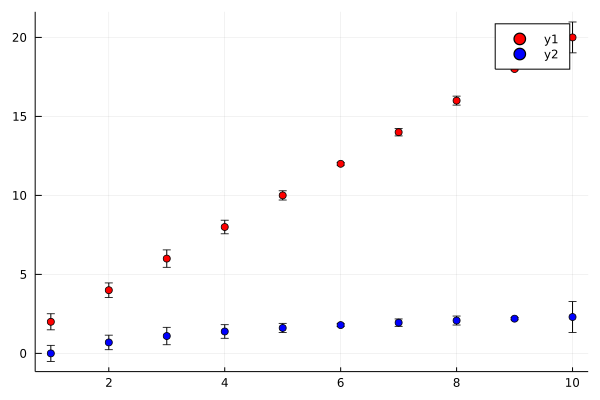

In [34]:
# Mozna odwolywac sie bezposrednio do kolumn w poniższy sposób (gdyz sa typu jednowymiarowych tablic 
# Array{T,1})

using Plots
scatter(df.a, [df.b, df.c], colour = [:red :blue], yerr=df.d)


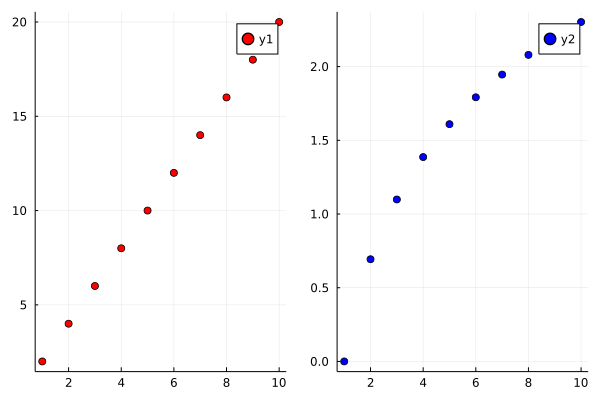

In [35]:
# użycie opcji layout
scatter(df.a, [df.b, df.c],  colour = [:red :blue ], layout=2)

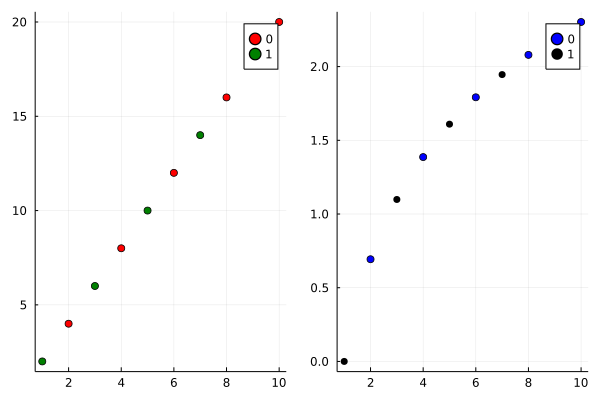

In [36]:
# użycie opcji layout i grup
scatter(df.a, [df.b, df.c], group=df.e,  colour = [:red :blue :green :black], layout=2)

### Zadanie 
- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot">LinearAlgebra.dot</a>) i mnożenia macierzy kwadratowej przez wektor z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.

### Rozwiązanie

#### Funkcje:

In [37]:
using LinearAlgebra

In [38]:
function dot_product(x,y)
    return dot(x,y)
end

dot_product (generic function with 1 method)

In [39]:
x = [1,2,3]
y = [3,4,5]
dot_product(x,y)

26

In [40]:
function scalar_times_matrix(scalar, m)
    return scalar * m
end

scalar_times_matrix (generic function with 1 method)

In [41]:
m1 = [1 5 ; 3 2]
scalar1 = 6
scalar_times_matrix(scalar1, m1)

2×2 Matrix{Int64}:
  6  30
 18  12

#### time tests:

In [42]:
@time dot_product(x,y)
@time scalar_times_matrix(scalar1, m1)

  0.000007 seconds
  0.000006 seconds (1 allocation: 112 bytes)


2×2 Matrix{Int64}:
  6  30
 18  12

In [43]:
rand(10)

10-element Vector{Float64}:
 0.7774776205098035
 0.20784164944926875
 0.059802877415563005
 0.8301378268588422
 0.5216493040656531
 0.3819159597971895
 0.6921455222680328
 0.5263696259177186
 0.6069766390646563
 0.8127336627815571

In [44]:
function count_dot_product_timetest(range)
    dot_p_time = []
    for i=range
    #     println(i)
        x1 = rand(i)
        y1 = rand(i)
        push!(dot_p_time, @elapsed dot_product(x1,y1))
    end
    return dot_p_time
end

count_dot_product_timetest (generic function with 1 method)

In [45]:
count_dot_product_timetest(1000:1000:10000)

10-element Vector{Any}:
 8.562e-6
 3.9e-7
 5.8e-7
 7.6e-7
 7.51e-7
 1.03e-6
 1.18e-6
 1.341e-6
 1.48e-6
 1.651e-6

In [46]:
function count_scalar_times_matrix_timetest(range)
    times = []
    for i=range
        m = [ rand(i) for j=1:i ]
#         println(m)
        push!( times, @elapsed scalar_times_matrix(rand(), m))
    end
    return times
end

count_scalar_times_matrix_timetest (generic function with 1 method)

In [47]:
count_scalar_times_matrix_timetest(5:5:5)

1-element Vector{Any}:
 0.134573597

In [48]:
count_scalar_times_matrix_timetest(1000:1000:10000)

10-element Vector{Any}:
 0.003157389
 0.008231497
 0.020580391
 0.070010096
 0.053919771
 0.074490543
 0.175796645
 0.133109901
 0.167413201
 0.21985914

#### Building a data frame

In [49]:
interval  = 1000 #start and interval
range = interval:interval:10*interval
timetest_data = DataFrame(length = range,
    dot = count_dot_product_timetest(range),
    scalar = count_scalar_times_matrix_timetest(range))

,length,dot,scalar
,Int64,Any,Any
1,1000,1.981e-6,0.0024875
2,2000,6.1e-7,0.00994141
3,3000,8.5e-7,0.0105426
4,4000,1.04e-6,0.0180024
5,5000,1.39e-6,0.0277491
6,6000,1.32e-6,0.0727986
7,7000,1.67e-6,0.0725862
8,8000,1.92e-6,0.127017
9,9000,2.22e-6,0.123524


In [50]:
for i=1:9
    tmp = DataFrame(length = range,
    dot = count_dot_product_timetest(range),
    scalar = count_scalar_times_matrix_timetest(range))
    append!(timetest_data,tmp)
end

In [51]:
timetest_data

,length,dot,scalar
,Int64,Any,Any
1,1000,1.981e-6,0.0024875
2,2000,6.1e-7,0.00994141
3,3000,8.5e-7,0.0105426
4,4000,1.04e-6,0.0180024
5,5000,1.39e-6,0.0277491
6,6000,1.32e-6,0.0727986
7,7000,1.67e-6,0.0725862
8,8000,1.92e-6,0.127017
9,9000,2.22e-6,0.123524


#### Save to file

In [52]:
CSV.write("timetests.csv", timetest_data)

"timetests.csv"

#### Read from file

In [53]:
my_timetest_data = CSV.read("timetests.csv", delim=",",DataFrame)

,length,dot,scalar
,Int64,Float64,Float64
1,1000,1.981e-6,0.0024875
2,2000,6.1e-7,0.00994141
3,3000,8.5e-7,0.0105426
4,4000,1.04e-6,0.0180024
5,5000,1.39e-6,0.0277491
6,6000,1.32e-6,0.0727986
7,7000,1.67e-6,0.0725862
8,8000,1.92e-6,0.127017
9,9000,2.22e-6,0.123524


In [54]:
names(my_timetest_data)

3-element Vector{String}:
 "length"
 "dot"
 "scalar"

In [55]:
describe(my_timetest_data)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,length,5500.0,1000,5500.0,10000,0,Int64
2,dot,1.15669e-6,3.5e-7,1.15e-6,2.321e-6,0,Float64
3,scalar,0.0778599,0.0015202,0.0537638,0.345084,0,Float64


In [56]:
sort(my_timetest_data)

,length,dot,scalar
,Int64,Float64,Float64
1,1000,1.67e-6,0.00247955
2,1000,1.711e-6,0.0015202
3,1000,1.92e-6,0.00159776
4,1000,1.981e-6,0.0024875
5,1000,1.99e-6,0.00179425
6,1000,2.02e-6,0.00163667
7,1000,2.07e-6,0.00212696
8,1000,2.171e-6,0.00158258
9,1000,2.23e-6,0.00154061


#### Group by length

In [57]:
my_data_grouped = groupby(my_timetest_data, :length)

,length,dot,scalar
,Int64,Float64,Float64
1,1000,1.981e-6,0.0024875
2,1000,1.67e-6,0.00247955
3,1000,1.92e-6,0.00159776
4,1000,1.711e-6,0.0015202
5,1000,2.23e-6,0.00154061
6,1000,2.07e-6,0.00212696
7,1000,2.171e-6,0.00158258
8,1000,1.99e-6,0.00179425
9,1000,2.02e-6,0.00163667


#### Add means and standard deviation columns

In [58]:
data_to_plot = combine(my_data_grouped, "dot" => mean, "dot" => std, 
    "scalar" => mean, "scalar" => std)

,length,dot_mean,dot_std,scalar_mean,scalar_std
,Int64,Float64,Float64,Float64,Float64
1,1000,2.0003e-6,1.95597e-7,0.00184262,0.000380529
2,2000,3.971e-7,7.60094e-8,0.0226556,0.0435434
3,3000,6.221e-7,8.2163e-8,0.0247436,0.0434326
4,4000,7.64e-7,1.10071e-7,0.038903,0.0453456
5,5000,9.522e-7,1.5847e-7,0.0440347,0.0466473
6,6000,1.049e-6,1.03005e-7,0.0598867,0.0175994
7,7000,1.2182e-6,1.60848e-7,0.134379,0.100873
8,8000,1.3782e-6,1.91058e-7,0.109903,0.0499239
9,9000,1.5271e-6,2.43743e-7,0.1487,0.0627825


In [59]:
data_to_plot

,length,dot_mean,dot_std,scalar_mean,scalar_std
,Int64,Float64,Float64,Float64,Float64
1,1000,2.0003e-6,1.95597e-7,0.00184262,0.000380529
2,2000,3.971e-7,7.60094e-8,0.0226556,0.0435434
3,3000,6.221e-7,8.2163e-8,0.0247436,0.0434326
4,4000,7.64e-7,1.10071e-7,0.038903,0.0453456
5,5000,9.522e-7,1.5847e-7,0.0440347,0.0466473
6,6000,1.049e-6,1.03005e-7,0.0598867,0.0175994
7,7000,1.2182e-6,1.60848e-7,0.134379,0.100873
8,8000,1.3782e-6,1.91058e-7,0.109903,0.0499239
9,9000,1.5271e-6,2.43743e-7,0.1487,0.0627825


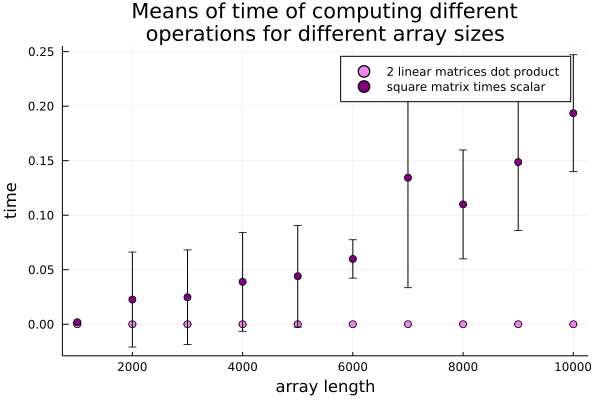

In [60]:
using Plots
scatter(data_to_plot.length,
    [data_to_plot.dot_mean data_to_plot.scalar_mean],
    colour = [:violet :purple ],
    yerr= [data_to_plot.dot_std data_to_plot.scalar_std],
    label = ["2 linear matrices dot product" "square matrix times scalar"],
    title = "Means of time of computing different
operations for different array sizes",
    xlab = "array length",
    ylab = "time"
)

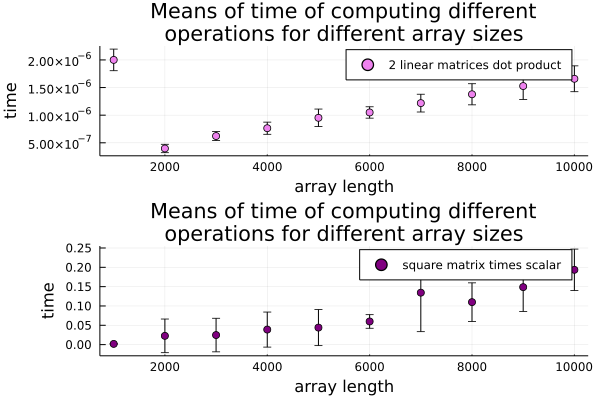

In [61]:
using Plots
scatter(data_to_plot.length,
    [data_to_plot.dot_mean data_to_plot.scalar_mean],
    colour = [:violet :purple ],
    yerr= [data_to_plot.dot_std data_to_plot.scalar_std],
    label = ["2 linear matrices dot product" "square matrix times scalar"],
    title = "Means of time of computing different
operations for different array sizes",
    xlab = "array length",
    ylab = "time",
    layout = (2,1)
)

Wykresy potwierdziły moje przypuszczenia.
Jak widać na powyższych wykresach, czas obliczania iloczynu skalarnego 2-ch macierzy rośnie liniowo względem długości macierzy, natomiast obliczanie iloczynu macierzy kwadratowej przez skalar rośnie kwadratowo względem długości boku macierzy.